- [Dog vs cat in Kaggle](https://www.kaggle.com/c/dogs-vs-cats)
- [Original note book](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/lesson1.ipynb)


## Basic Setup
Load library

In [20]:
%run env_setup.py
%matplotlib inline
from importlib import reload
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

Load data

In [3]:
from utils.datasets.kaggle import dog_cat
reload(dog_cat)

data_dir = dog_cat.download_data()

Default path

In [4]:
#path = os.path.join(data_dir, 'sample')
path = data_dir

## Use pretrained VGG model

- VGG19: large, slow, slightly accurate
- VGG16: small, fast

We use VGG16

In [4]:
## As large as you can, but no larger than 64 is recommanded
batch_size = 64

In [5]:
import vgg16
reload(vgg16)
from vgg16 import Vgg16

In [7]:
vgg = Vgg16()
batches = vgg.get_batches(os.path.join(path, 'train'), batch_size=batch_size)
val_batches = vgg.get_batches(os.path.join(path, 'valid'), batch_size=batch_size)

vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

D:\learn\online_course\notes\fast_ai\deeplearning1\vgg16.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
D:\learn\online_course\notes\fast_ai\deeplearning1\vgg16.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
D:\learn\online_course\notes\fast_ai\deeplearning1\vgg16.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
D:\learn\online_course\notes\fast_ai\deeplearning1\vgg16.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
359/359 [==============================] - 151s - loss: 0.4408 - acc: 0.8691 - val_loss: 0.2688 - val_acc: 0.9047


## VGG16 details

In [6]:
vgg=Vgg16()

D:\dev\learn\learning_notes\fast_ai\deeplearning1\vgg16.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
D:\dev\learn\learning_notes\fast_ai\deeplearning1\vgg16.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
D:\dev\learn\learning_notes\fast_ai\deeplearning1\vgg16.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
D:\dev\learn\learning_notes\fast_ai\deeplearning1\vgg16.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))


- create vgg model based on keras
- weights are downloaded from web

In [8]:
batches = vgg.get_batches(os.path.join(path, 'train'), batch_size=4)

Found 23000 images belonging to 2 classes.


create a batch generator which load image from directory. Yes the is not necessarily contained by the model object. We can seperate the batch generator from vgg

In [24]:
imgs, labels = batches.next()
print(type(imgs), imgs.shape)
print(type(labels), labels.shape)

<class 'numpy.ndarray'> (4, 3, 224, 224)
<class 'numpy.ndarray'> (4, 2)


each batch load image by cpu and saved as numpy array

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


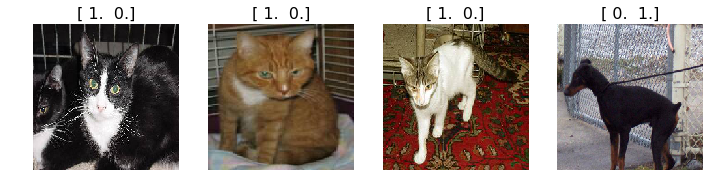

In [28]:
import utils.display as dis
reload(dis)
dis.imshow(imgs, titles=labels)

Data is loaded, model is prepared. Let's try predict

In [29]:
vgg.predict(imgs, details=True)

(array([ 0.2593,  0.1427,  0.0872,  0.5166], dtype=float32),
 array([232, 338, 355, 355], dtype=int64),
 ['Border_collie', 'guinea_pig', 'llama', 'llama'])

So it means

[dog maybe, a pig, llama not sure, llama I guess]

I don't really believe the pretrained model now.

In [31]:
vgg.classes[:4]

['tench', 'goldfish', 'great_white_shark', 'tiger_shark']

## Finetune for dog/cat

## Build up VGG
